In [1]:
# importing all the library 
# all are not used but i have still kept to avoid errors
import pandas as pd
import math
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, metrics,datasets,svm,linear_model, tree, ensemble
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import make_classification,load_iris,load_digits
from sklearn.metrics import roc_curve, roc_auc_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,ParameterGrid,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer,HashingVectorizer, CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,Normalizer,StandardScaler

import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
from numpy import mean,std
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE 
from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

from keras import layers
from keras.backend import clear_session
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras_preprocessing.sequence import pad_sequences
import keras
from keras.layers import Dense, Activation, concatenate, Embedding, Input

import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [3]:
# Train set 
train_data=fetch_20newsgroups(subset='train')
train_feat=train_data.data
train_label=train_data.target

In [4]:
# Test set 
test_data=fetch_20newsgroups(subset='test')
test_fech=test_data.data
test_label=test_data.target

In [5]:
news20_classes=train_data.target_names
num_class=len(news20_classes)

In [6]:
#using keras.utils.to_categorical 
y_train_catego = keras.utils.to_categorical(train_label, num_class)
test_y= keras.utils.to_categorical(test_label, num_class)

In [7]:
# splitting the data at 20 % and 80%
X_train,X_val,y_train,y_val=train_test_split(train_feat,y_train_catego,test_size=0.2,random_state=42,stratify=y_train_catego)

In [8]:
#setting the parrameter for tokenizing
num_words=5000
tokenizer=Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_matrix(X_train,mode='tfidf')
X_val=tokenizer.texts_to_matrix(X_val,mode='tfidf')
X_test=tokenizer.texts_to_matrix(test_fech,mode='tfidf')
# printing the train & validation data set using .shape
print('Train data shape',X_train.shape)
print('Validation data shape',X_val.shape)

Train data shape (9051, 5000)
Validation data shape (2263, 5000)


In [21]:
embedding_dim = 300
maxlen=50
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

119286
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 300)           35785800  
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dense_5 (Dense)             (None, 100)               1500100   
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 37,286,921
Trainable params: 37,286,921
Non-trainable params: 0
_________________________________________________________________


In [26]:
y_val.shape

(2263, 20)

In [27]:
def Model_mlp(vectorize_format,num_class,mlp_structure,dropout_rate,vocab_size,embedding_dim,maxlen):
    model=keras.Sequential()
    if vectorize_format=='sequence':
        model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim, input_length=maxlen,trainable=True))
        model.add(layers.GlobalMaxPooling1D())
    else:
        model.add(keras.Input(shape=(num_words,)))
        
    for n_units in mlp_structure:
        model.add(layers.Dense(n_units,activation='relu'))
        model.add(layers.Dropout(dropout_rate))
        
    model.add(layers.Dense(num_class,activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [28]:
embedding_dim = 600
maxlen=100
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
mlp_structure=[256,128]
baseline = Model_mlp(vectorize_format='tfidf',num_class=num_class,mlp_structure=mlp_structure,
                           dropout_rate=0.2,vocab_size=None,embedding_dim=None, maxlen=None)
baseline.summary()

119286
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               1280256   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 20)                2580      
                                                                 
Total params: 1,315,732
Trainable params: 1,315,732
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=baseline.fit(X_train, y_train, batch_size=10, epochs=5, validation_data=(X_val,y_val))

Epoch 1/5
906/906 [==============================] - 6s 7ms/step - loss: 1.1283 - accuracy: 0.7020 - val_loss: 0.6461 - val_accuracy: 0.8299
Epoch 2/5
906/906 [==============================] - 6s 6ms/step - loss: 0.3174 - accuracy: 0.9288 - val_loss: 0.6995 - val_accuracy: 0.8303
Epoch 3/5
906/906 [==============================] - 6s 7ms/step - loss: 0.1920 - accuracy: 0.9603 - val_loss: 0.6841 - val_accuracy: 0.8418
Epoch 4/5
906/906 [==============================] - 7s 7ms/step - loss: 0.0889 - accuracy: 0.9786 - val_loss: 0.7530 - val_accuracy: 0.8537
Epoch 5/5
906/906 [==============================] - 6s 7ms/step - loss: 0.1498 - accuracy: 0.9745 - val_loss: 0.9346 - val_accuracy: 0.8418


Training Accuracy: 0.9956
Validation Accuracy:  0.8418


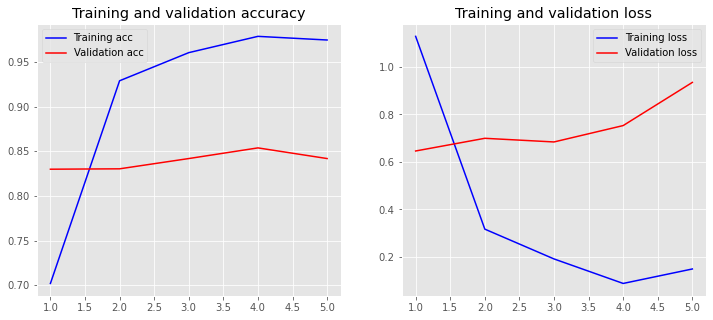

In [30]:
# printing the plots 
loss, accuracy = baseline.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = baseline.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Model Tunining 

In [82]:
# setting parameters 
batch_size = [64]
epochs = [5]

In [83]:
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [84]:
from scikeras.wrappers import KerasClassifier

In [85]:
model = KerasClassifier(build_fn=baseline,
                            epochs=epochs, batch_size=10,
                            verbose=False)

In [86]:
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                              cv=10, verbose=1,scoring='accuracy')

In [87]:
# using 10 fits to get better acuuracy at end 
grid_result = grid.fit(X_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpy2t3r2fi\assets
Fitting 10 folds for each of 1 candidates, totalling 10 fits
INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpa4d0y2z6\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpzp9o5mx7\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmp0qe_slnp\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmprt2v5y5k\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmp77rfzvf0\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmp18_dm2ih\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmppe8s0psq\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpovn37s1t\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmps5gkar30\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpj7atyj34\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpe593w5tt\assets
INFO:tensorflow:Assets written to: C:\Users\DHRUVJ~1\AppData\Local\Temp\tmpyzpvj6mk\assets


C:\Users\Dhruv Jain\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [44]:
val_acc = grid_result.score(X_val, y_val)

In [45]:
# printing the vali accuracy
print(val_acc)

0.8572691117984975


In [46]:
train_acc=grid.score(X_train,y_train)

In [47]:
print(train_acc)

0.9981217545022649


In [48]:
grid_result.best_score_

0.9783458344004975

In [49]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 5}

In [50]:
testy=baseline.predict(X_test)

236/236 [==============================] - 1s 2ms/step


In [51]:
yhat_probs = baseline.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(baseline.predict(X_test, verbose=0),axis=-1)

In [52]:
yhat_probs = yhat_probs[:, 0]

In [53]:
type(yhat_classes)

numpy.ndarray

In [81]:
(yhat_probs).shape
yhat_classes.shape
test_y_1.shape
test_y_1
yhat_classes

array([ 4, 18,  0, ...,  9, 12, 15], dtype=int64)

In [66]:
test_y_1 = test_y[:, 0]

In [67]:
yhat_onehot=keras.utils.to_categorical(yhat_classes, num_class)

In [68]:
yhat_onehot.shape

(7532, 20)

In [69]:
yhat_onehot=yhat_onehot[:,0]

In [70]:
accuracy = accuracy_score(test_y_1, yhat_onehot)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y_1, yhat_onehot,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y_1, yhat_onehot,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y_1, yhat_onehot,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.978359
Precision: 0.976743
Recall: 0.978359
F1 score: 0.977015


In [71]:
yhat_probs = grid_result.predict(X_test)
# predict crisp classes for test set
yhat_classes = np.argmax(grid_result.predict(X_test),axis=-1)

In [73]:
yhat_probs = yhat_probs[:, 0]
type(yhat_classes)

numpy.ndarray

In [74]:
yhat_classes.shape

(7532,)

In [75]:
yhat_onehot=keras.utils.to_categorical(yhat_classes, num_class)
yhat_onehot=yhat_onehot[:,0]

In [77]:
yhat_onehot.shape

(7532,)

In [78]:
accuracy = accuracy_score(test_y_1, yhat_onehot)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y_1, yhat_onehot,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y_1, yhat_onehot,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y_1, yhat_onehot,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.975969
Precision: 0.977256
Recall: 0.975969
F1 score: 0.976533
